In [344]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [348]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [349]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [350]:
object = yf.Ticker("TSLA")

In [351]:
tesla_data = object.history(period="max")

In [352]:
tesla_data.reset_index(inplace=True)

In [353]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [354]:
html_data = requests.get(url).text

In [355]:
soup = BeautifulSoup(html_data,"html.parser")

In [356]:
tables = soup.find_all('table')

In [357]:
for i,table in enumerate (tables):
    if("Tesla Quarterly Revenue" in str(table)):
        table_index = i

In [358]:
specific_table = tables[table_index]

In [359]:
specific_table_html = str(specific_table)
Table_object= BeautifulSoup(specific_table_html,"html.parser")

In [360]:
headers = [th.text for th in Table_object.find_all('th')]
data = []
for tr in Table_object.find_all('tr')[1:]:  # Skip the header row
    row = [td.text for td in tr.find_all('td')]
    data.append(row)


In [361]:
tesla_revenue = pd.DataFrame(data,columns=["Date", "Revenue"])


In [362]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

<>:1: SyntaxWarning:

invalid escape sequence '\$'

<>:1: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\n0r043t\AppData\Local\Temp\ipykernel_20132\1877950674.py:1: SyntaxWarning:

invalid escape sequence '\$'



In [363]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [364]:
object1 = yf.Ticker("GME")

In [365]:
gme_data = object1.history(period="max")

In [366]:
gme_data.reset_index(inplace=True)

In [367]:
url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [368]:
html_data_2 = requests.get(url1).text

In [369]:
beautiful_soup = BeautifulSoup(html_data_2,"html.parser")

In [370]:
tables_2 = soup.find_all('table')

In [371]:
for i,table in enumerate (tables_2):
    if("GameStop Revenue" in str(table)):
        table_index = i


In [372]:
specific_table_2 = tables[table_index]

In [373]:
specific_table_html_2 = str(specific_table_2)
Table_object_2= BeautifulSoup(specific_table_html,"html.parser")

In [374]:
headers = [th.text for th in Table_object.find_all('th')]
data = []
for tr in Table_object.find_all('tr')[1:]:  # Skip the header row
    row = [td.text for td in tr.find_all('td')]
    data.append(row)


In [375]:
gme_revenue = pd.DataFrame(data,columns = ["Date","Revenue"])

In [376]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)

<>:1: SyntaxWarning:

invalid escape sequence '\$'

<>:1: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\n0r043t\AppData\Local\Temp\ipykernel_20132\1655338250.py:1: SyntaxWarning:

invalid escape sequence '\$'



In [377]:
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

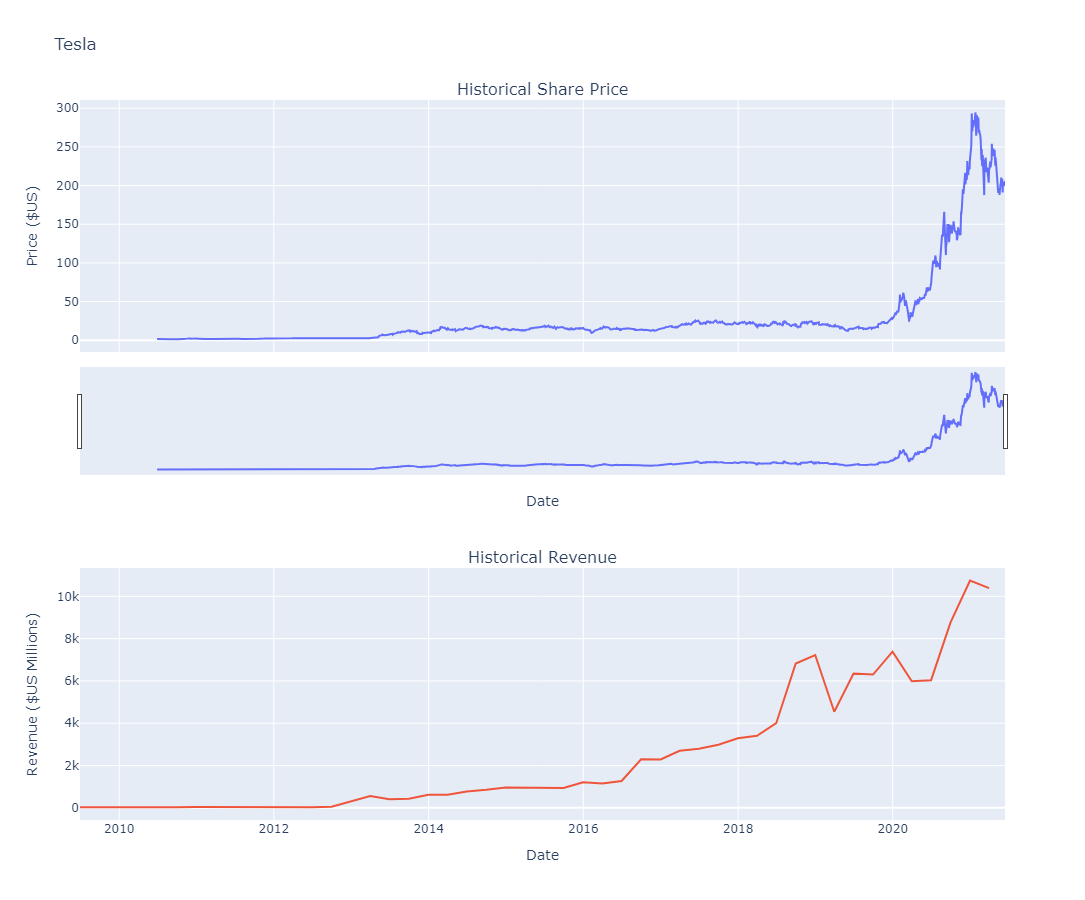

In [378]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

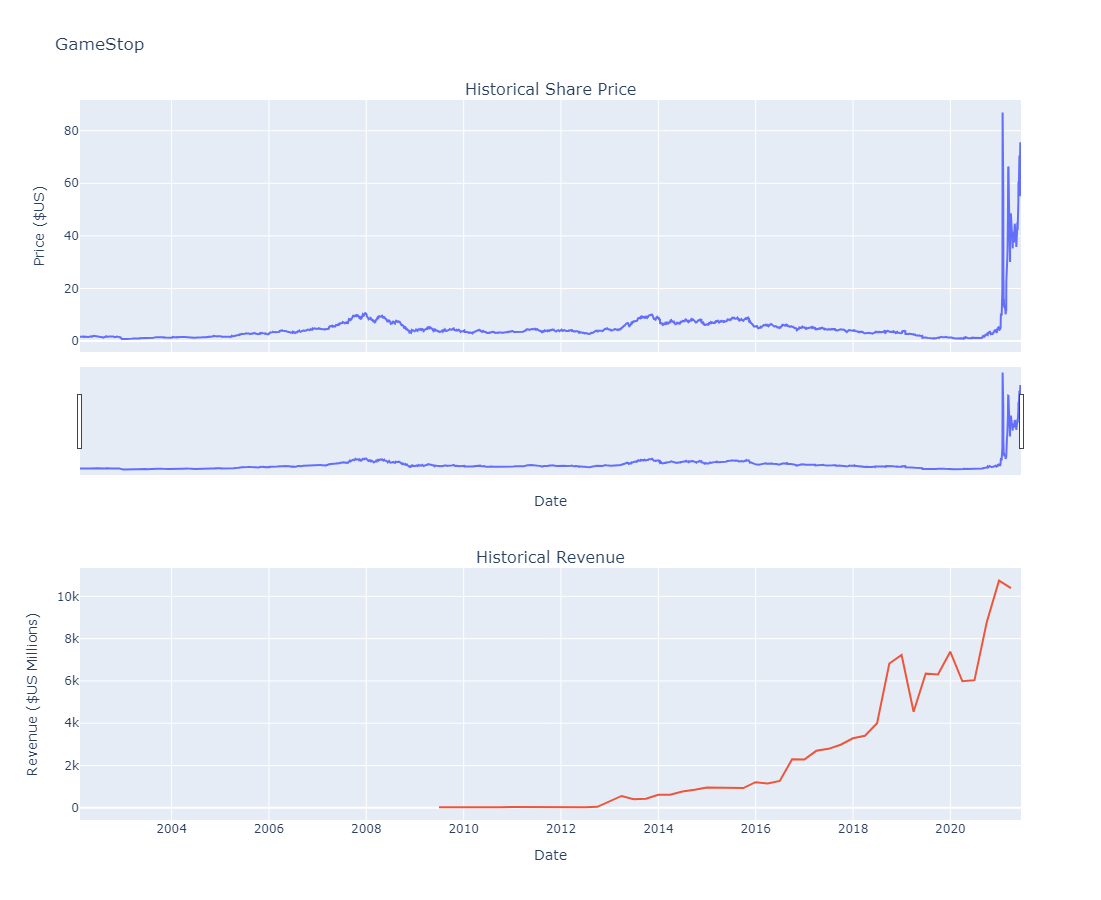

In [403]:
make_graph(gme_data, gme_revenue, 'GameStop')